<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment6/Assignment6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
print(train_features[0].shape)
print(num_classes)

(32, 32, 3)
10


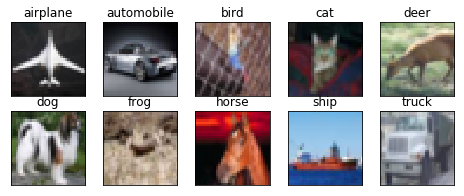

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [12]:
# Define the model
from keras.regularizers import l2
from keras.layers import SeparableConv2D

# RF 3
# input size 32
model = Sequential()
model.add(SeparableConv2D(64, kernel_size=(3, 3), border_mode='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 5
# input size 32
model.add(SeparableConv2D(128,  kernel_size=(3, 3), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 10
# input size 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(64,  kernel_size=(1, 1), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 12
# input size 16
model.add(SeparableConv2D(128,  kernel_size=(3, 3), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# RF 14
# input size 16
model.add(SeparableConv2D(256,  kernel_size=(3, 3), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 28
# input size 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(128,  kernel_size=(1, 1), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 30
# input size 8
model.add(SeparableConv2D(256,  kernel_size=(3, 3), border_mode='same', kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#RF 32
# input size 8
model.add(SeparableConv2D(num_classes, 8, 8))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_regularizer=<keras.reg..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, kernel_size=(1, 1), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_14 (Separab (None, 32, 32, 64)        283       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_15 (Separab (None, 32, 32, 128)       8896      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)       512       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (8, 8))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=100, verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 28s 73ms/step - loss: 1.2943 - acc: 0.5366 - val_loss: 1.1905 - val_acc: 0.5794
Epoch 2/100
390/390 [==============================] - 26s 66ms/step - loss: 0.8958 - acc: 0.6841 - val_loss: 1.0570 - val_acc: 0.6494
Epoch 3/100
390/390 [==============================] - 26s 66ms/step - loss: 0.7711 - acc: 0.7298 - val_loss: 0.8889 - val_acc: 0.6975
Epoch 4/100
390/390 [==============================] - 26s 66ms/step - loss: 0.6957 - acc: 0.7546 - val_loss: 0.7909 - val_acc: 0.7274
Epoch 5/100
390/390 [==============================] - 26s 66ms/step - loss: 0.6370 - acc: 0.7780 - val_loss: 0.7505 - val_acc: 0.7322
Epoch 6/100
390/390 [==============================] - 26s 66ms/step - loss: 0.5923 - acc: 0.7930 - val_loss: 0.6896 - val_acc: 0.7712
Epoch 7/100
390/390 [==============================] - 26s 66ms/step - loss: 0.5569 - acc: 0.8041 - val_loss: 0.7196 - val_acc: 0.7601
Epoch 8/100
390/390 [==============================] - 26s 66ms/ste

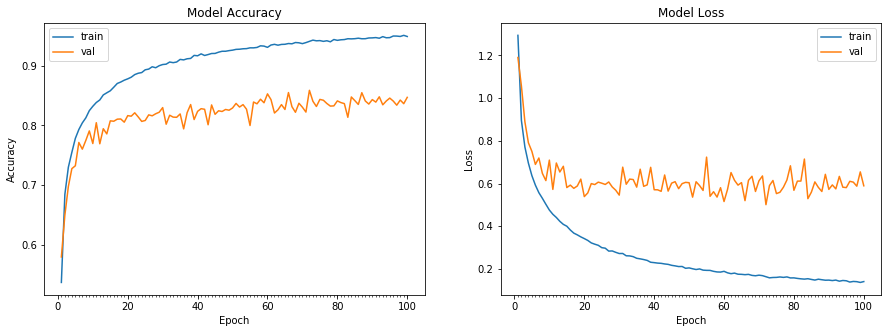

Accuracy on test data is: 84.16


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                            featurewise_center=True,
                            featurewise_std_normalization=True)

testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = testgen.flow(test_features, test_labels), validation_steps=100, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))